In [ ]:
pip install --upgrade pip

In [ ]:
pip install tensorflow

In [ ]:
pip install tf-nightly

In [ ]:
pip install --upgrade keras

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Training image preprocessing

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/nutrition app/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3120 files belonging to 36 classes.


VALIDATION IMAGE PREPROCESSING

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/nutrition app/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


BUILDING MODEL

In [ ]:
cnn = tf.keras.models.Sequential()

BUILDING CONVOLUTION LAYERS

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))


In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5))


In [ ]:
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

Compiling of training phase

In [ ]:
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_44 (Conv2D)                   │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_45 (Conv2D)                   │ (None, 62, 62, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_46 (Conv2D)                   │ (None, 31, 31, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_47 (Conv2D)                   │ (None, 29, 29, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_48 (Conv2D)                   │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_49 (Conv2D)                   │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 36)                  │           9,252 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,460,164 (5.57 MB)

 Trainable params: 1,460,164 (5.57 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 91s 907ms/step - accuracy: 0.0399 - loss: 8.2499 - val_accuracy: 0.0285 - val_loss: 3.5835
Epoch 2/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 88s 894ms/step - accuracy: 0.0279 - loss: 3.6321 - val_accuracy: 0.0484 - val_loss: 3.4667
Epoch 3/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 145s 922ms/step - accuracy: 0.0519 - loss: 3.5606 - val_accuracy: 0.0741 - val_loss: 3.2161
Epoch 4/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 94s 964ms/step - accuracy: 0.0772 - loss: 3.3935 - val_accuracy: 0.0940 - val_loss: 3.0878
Epoch 5/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 135s 894ms/step - accuracy: 0.0887 - loss: 3.2809 - val_accuracy: 0.1453 - val_loss: 2.9570
Epoch 6/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 141s 885ms/step - accuracy: 0.1026 - loss: 3.1176 - val_accuracy: 0.2479 - val_loss: 2.7463
Epoch 7/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 141s 874ms/step - accuracy: 0.1363 - loss: 2.9515 - val_accuracy: 0.2821 - val_loss: 2.6496
Epoch 8/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 87s 887ms/step - accuracy: 0.1842 - loss: 2.8255 - val_

EVALUATING MODEL

In [ ]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 ━━━━━━━━━━━━━━━━━━━━ 56s 566ms/step - accuracy: 0.8035 - loss: 0.7666
Training accuracy: 0.8147435784339905


In [ ]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 563ms/step - accuracy: 0.8759 - loss: 0.5341
Validation accuracy: 0.8888888955116272


SAVING MODEL

In [ ]:
cnn.save('trained_model.h5')

In [ ]:
training_history.history

{'accuracy': [0.03621795028448105,
  0.03205128386616707,
  0.05576923117041588,
  0.07724358886480331,
  0.08910256624221802,
  0.10737179219722748,
  0.14711537957191467,
  0.17980769276618958,
  0.20705127716064453,
  0.23237179219722748,
  0.25737178325653076,
  0.27435898780822754,
  0.3144230842590332,
  0.3314102590084076,
  0.35256409645080566,
  0.36955127120018005,
  0.39839744567871094,
  0.4214743673801422,
  0.44198718667030334,
  0.4445512890815735,
  0.4721153974533081,
  0.482051283121109,
  0.5057692527770996,
  0.5185897350311279,
  0.5230769515037537,
  0.5391025543212891,
  0.548397421836853,
  0.5762820243835449,
  0.5756410360336304,
  0.596794843673706,
  0.5961538553237915,
  0.6105769276618958],
 'loss': [4.581169605255127,
  3.6192197799682617,
  3.5184242725372314,
  3.3659727573394775,
  3.2482211589813232,
  3.1054866313934326,
  2.9265458583831787,
  2.8000664710998535,
  2.688800811767578,
  2.568251848220825,
  2.492513418197632,
  2.4147942066192627,
  

In [ ]:
#recording history
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [ ]:
training_loss,training_acc = cnn.evaluate(training_set)

98/98 ━━━━━━━━━━━━━━━━━━━━ 58s 588ms/step - accuracy: 0.8097 - loss: 0.7531


In [ ]:
validation_loss,validation_acc =cnn.evaluate(validation_set)

11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 663ms/step - accuracy: 0.9013 - loss: 0.4493


CALCULATING ACCURACY OF VALIDATION SET

In [ ]:
print("Validation set accuracy: {} ".format(training_history.history['val_accuracy'][-1]*100))

Validation set accuracy: 88.88888955116272 


ACCURACY VISUALIZATION

In [ ]:
training_history.history['accuracy']

[0.03621795028448105,
 0.03205128386616707,
 0.05576923117041588,
 0.07724358886480331,
 0.08910256624221802,
 0.10737179219722748,
 0.14711537957191467,
 0.17980769276618958,
 0.20705127716064453,
 0.23237179219722748,
 0.25737178325653076,
 0.27435898780822754,
 0.3144230842590332,
 0.3314102590084076,
 0.35256409645080566,
 0.36955127120018005,
 0.39839744567871094,
 0.4214743673801422,
 0.44198718667030334,
 0.4445512890815735,
 0.4721153974533081,
 0.482051283121109,
 0.5057692527770996,
 0.5185897350311279,
 0.5230769515037537,
 0.5391025543212891,
 0.548397421836853,
 0.5762820243835449,
 0.5756410360336304,
 0.596794843673706,
 0.5961538553237915,
 0.6105769276618958]

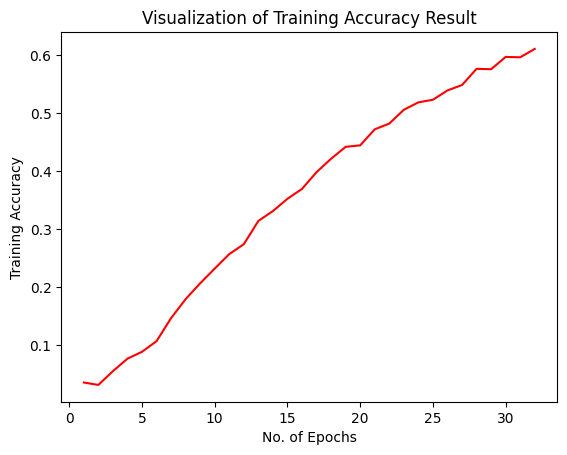

In [ ]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Training Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

VALIDATION ACCURACY

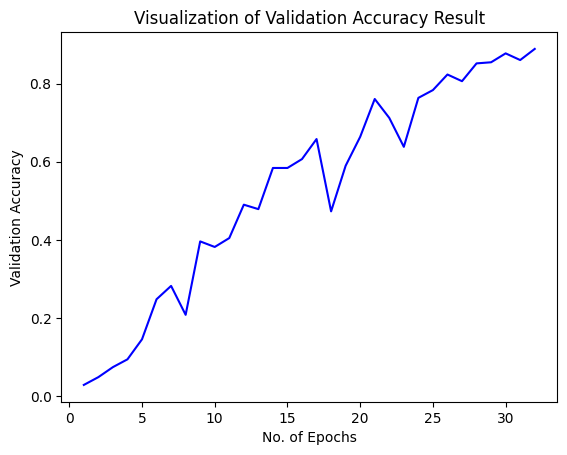

In [ ]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

In [ ]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 ━━━━━━━━━━━━━━━━━━━━ 52s 524ms/step - accuracy: 0.8098 - loss: 0.7504
Training accuracy: 0.8147435784339905


In [ ]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 643ms/step - accuracy: 0.8799 - loss: 0.5020
Validation accuracy: 0.8888888955116272


TEST AND EVALUATION

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/nutrition app/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [ ]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 546ms/step - accuracy: 0.8973 - loss: 0.5105
Test accuracy: 0.8913649320602417


In [1]:
test_acc